In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


# Data Preperation

In [2]:
import keras
#(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
(keras_x_train, keras_y_train), (keras_x_test, keras_y_test) = keras.datasets.mnist.load_data()

print(keras_x_train.shape)
print(keras_y_train.shape)
print(keras_x_test.shape)
print(keras_y_test.shape)

2024-11-08 10:09:58.181947: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-08 10:09:58.182084: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-08 10:09:58.360436: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
#important to know that each train is from 0 to 255. So i need the train data to be normalized for being from 0 to 1 (I will do it all together after merging two data)
keras_x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [4]:
keras_y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
from tensorflow.keras.utils import to_categorical

 
#Important to know that my model will fit, after that the output will be 10 class categorisation because categorical_crossentropy is not binary output. each value will have 10 different weights. 
#I will pick up only max powerful value as a prediction value. So i want y values to be categorical. 

keras_y_train = to_categorical(keras_y_train, num_classes=10)
keras_y_test = to_categorical(keras_y_test, num_classes=10)
keras_y_train[0] # 5 is equal to --- array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [6]:
from sklearn.model_selection import train_test_split
#Since using CNN, i need the data to be 28x28 form because CNN is taking advantages from where each pixel is located especially for edge detections. That's why, all data will stay 28x28.
kaggle_train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
y = kaggle_train['label']
kaggle_train = kaggle_train.drop(['label'],axis = 1)

kaggle_x_train, kaggle_x_test, kaggle_y_train, kaggle_y_test = train_test_split(kaggle_train, y, test_size=0.2, random_state=42)

print(kaggle_x_train.shape)
print(kaggle_y_train.shape)
print(kaggle_x_test.shape)
print(kaggle_y_test.shape)

(33600, 784)
(33600,)
(8400, 784)
(8400,)


In [7]:
#lets resize the kaggle data to be 28x28:
kaggle_x_train = kaggle_x_train.values.reshape(33600,28,28)
kaggle_x_test = kaggle_x_test.values.reshape(8400,28,28)

#lets category the Y values to be 10 classes: 
kaggle_y_train = to_categorical(kaggle_y_train, num_classes=10)
kaggle_y_test = to_categorical(kaggle_y_test, num_classes=10)

In [8]:
#make sure keras data and kaggle data is competible for each other
print('kaggle data:')
print(kaggle_x_train.shape)
print(kaggle_x_test.shape)
print(kaggle_y_train.shape)
print(kaggle_y_test.shape)

print('keras data:')
print(keras_x_train.shape)
print(keras_x_test.shape)
print(keras_y_train.shape)
print(keras_y_test.shape)

kaggle data:
(33600, 28, 28)
(8400, 28, 28)
(33600, 10)
(8400, 10)
keras data:
(60000, 28, 28)
(10000, 28, 28)
(60000, 10)
(10000, 10)


In [9]:
#LETS MERGE DATA :

X_train = np.concatenate((kaggle_x_train,keras_x_train), axis=0)
y_train = np.concatenate((kaggle_y_train,keras_y_train), axis=0) 
X_test = np.concatenate((kaggle_x_test,keras_x_test), axis=0)
y_test = np.concatenate((kaggle_y_test,keras_y_test), axis=0)

In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(93600, 28, 28)
(93600, 10)
(18400, 28, 28)
(18400, 10)


In [11]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  63,
        253, 121,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  63,
        254, 202,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 163,
        255, 144,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 167,
        251,  26,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [12]:
#All data is ready expect normalization of each input value beacause they still remain 0 to 255. i want them to be 0 to 1 

X_train = X_train/255
X_test = X_test/255
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.24705882, 0.99215686, 0.4745098 ,
        0.        , 0.    

# Model Preperation

In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation, Dropout

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), padding='same',input_shape=(28, 28, 1)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, kernel_size=(3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    Dense(10, activation='softmax')  # Assuming 10 classes
])

In [40]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_17 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 422,538 (1.61 MB)

 Trainable params: 422,090 (1.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [41]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

early_stoping = EarlyStopping(
    monitor = 'val_loss',
    patience = 5,
    verbose = 1,
    mode = 'min')


#Reduce learning rate when a metric has stopped improving.
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.20,
                              patience=3, min_lr=1e-6,verbose = 1, mode = 'min')

In [42]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_cnn = model.fit(X_train, y_train, epochs=40, batch_size=32,validation_data=(X_test, y_test),callbacks=[early_stoping,reduce_lr])

Epoch 1/40
  51/2925 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6021 - loss: 1.2678

W0000 00:00:1731061974.648570     140 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2916/2925 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9378 - loss: 0.2191

W0000 00:00:1731061983.229770     140 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2925/2925 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9379 - loss: 0.2188 - val_accuracy: 0.9895 - val_loss: 0.0331 - learning_rate: 0.0010
Epoch 2/40
2925/2925 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9829 - loss: 0.0573 - val_accuracy: 0.9929 - val_loss: 0.0210 - learning_rate: 0.0010
Epoch 3/40
2925/2925 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9876 - loss: 0.0424 - val_accuracy: 0.9925 - val_loss: 0.0228 - learning_rate: 0.0010
Epoch 4/40
2925/2925 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9902 - loss: 0.0307 - val_accuracy: 0.9933 - val_loss: 0.0183 - learning_rate: 0.0010
Epoch 5/40
2925/2925 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9914 - loss: 0.0275 - val_accuracy: 0.9957 - val_loss: 0.0136 - learning_rate: 0.0010
Epoch 6/40
2925/2925 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9928 - loss: 0.0229 - val_accuracy: 0.9963 - val_loss: 0.0122 - learning_rate: 0.0010
Epoch 7/40
2925/2925 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9929 - loss: 0.022

In [43]:
stopped_epoch = len(history_cnn.history['loss'])
print('Stopped at',stopped_epoch)

#to start the graph from 1 not 0 because there is no epoch0.
history_df = pd.DataFrame(history_cnn.history)
history_df.index = history_df.index + 1


Stopped at 25


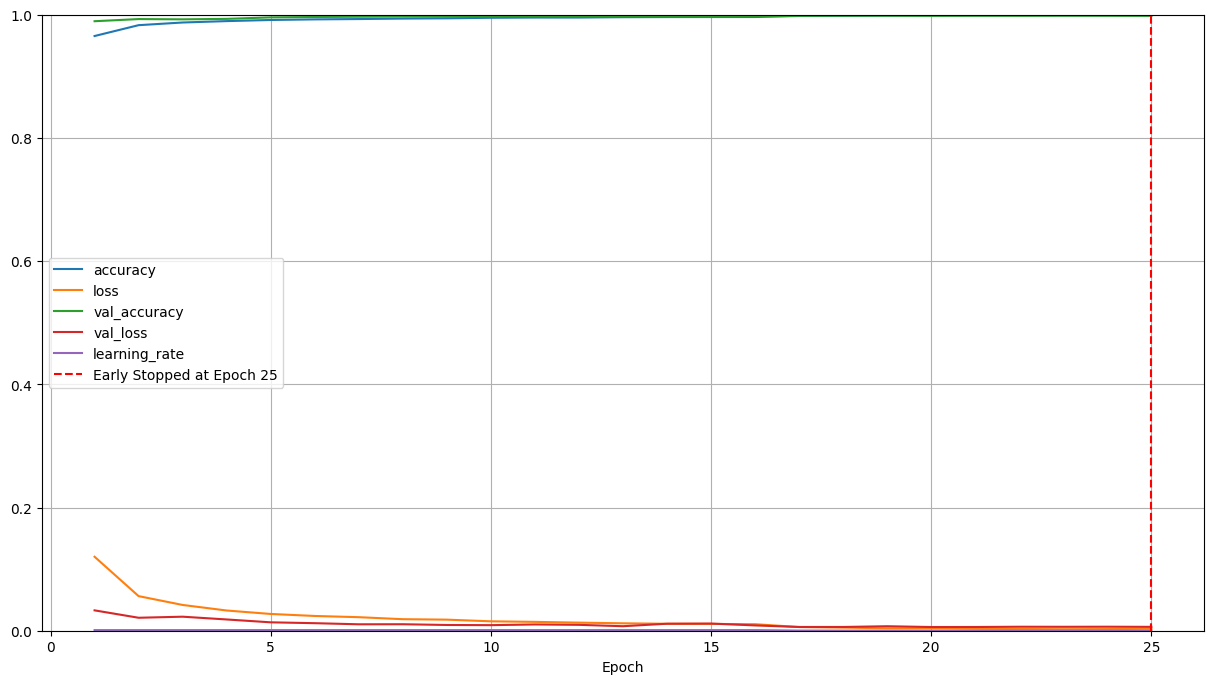

In [44]:
import matplotlib.pyplot as plt

# Plot with adjusted index
history_df.plot(figsize=(15, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1)

# Add early stopping line
plt.axvline(x=stopped_epoch, color='red', linestyle='--', label=f'Early Stopped at Epoch {stopped_epoch}')
plt.legend(loc="best")
plt.xlabel("Epoch")
plt.show()

# Testing and Submission

In [45]:
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
sub = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')
id=sub['ImageId']
test.shape


(28000, 784)

In [46]:
testdata = test.values.reshape(28000, 28, 28)
testdata[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  10,  17,  17,
         17,  17,  81, 180, 180,  35,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253, 253,
        253, 253, 253, 253, 253,  48,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [47]:
test_normaled = testdata/255
test_normaled[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [48]:
test_prediction = model.predict(test_normaled)

#since my model is based on categorical cross entropy, the output layer must has 10 possibilites. But the max value is what i am taking interest.
test_max_prob = np.argmax(test_prediction, axis=1)

#Writing csv file for submission
mydict = {'ImageId': id, 'Label': test_max_prob}
pd.DataFrame(mydict).to_csv('/kaggle/working/submission_DL_CNN_final2.csv', index=False)

103/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

W0000 00:00:1731062263.225442     143 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
